### testing out my own function for generating tpr, fpr, and roc curves

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import glob
import os
from astropy.io import fits
import importlib.util
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.backends.backend_pdf
import re

In [53]:
def roc_manual(predictions, targets, title=False, auc_type=False):
    '''
    Input predictions and targets to generate roc plot to maximum resolution. Optional specification
    of a plot title and auc type (for when plotting multiple models/data preparations) 
    '''
    #get sets
    num_0s = 0
    num_1s = 0
    for t in targets:
        if int(t) == 0:
            num_0s += 1
        if int(t) == 1:
            num_1s += 1
    step_tpr = float(1/num_1s)
    step_fpr = float(1/num_0s)
    tpr_pts = [1]
    fpr_pts = [1]
    for pred in sorted(predictions):
        threshold = pred
        tpr = 0.
        fpr = 0.
        for p,t in zip(predictions, targets):
            if p > threshold and int(t) == 1:
                fpr += step_tpr
            if p > threshold and int(t) == 0:
                tpr += step_fpr
        tpr_pts.append(tpr)
        fpr_pts.append(fpr)
    auc_plot = auc(tpr_pts, fpr_pts)
    #plot
    plt.figure(figsize=(10,10))
    if title != False:
        plt.title(title, fontsize=15)
    else:
        plt.title('ROC', fontsize=15)
    plot_label = 'AUC = {:.2f}%'.format(auc_plot)
    if auc_type != False:
        plot_label = '{} AUC = {:.2f}%'.format(auc_type, auc_plot)
    plt.plot(tpr_pts, fpr_pts, color='b', label=plot_label)
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc='lower right', fontsize=15)
    plt.show()
    
    return tpr_pts, fpr_pts, auc

In [ ]:
def tpr_fpr_auc(predictions, targets):
    '''
    Returns tpr, fpr, auc for given predictions with targets.
    '''
    num_0s = 0
    num_1s = 0
    for t in targets:
        if int(t) == 0:
            num_0s += 1
        if int(t) == 1:
            num_1s += 1
    step_tpr = float(1/num_1s)
    step_fpr = float(1/num_0s)
    tpr_pts = [1]
    fpr_pts = [1]
    for pred in sorted(predictions):
        threshold = pred
        tpr = 0.
        fpr = 0.
        for p,t in zip(predictions, targets):
            if p > threshold and int(t) == 1:
                fpr += step_tpr
            if p > threshold and int(t) == 0:
                tpr += step_fpr
        tpr_pts.append(tpr)
        fpr_pts.append(fpr)
    ret_auc = metrics.auc(tpr_pts, fpr_pts)
    
    return tpr_pts, fpr_pts, ret_auc

In [ ]:
def plot_roc_manual(tpr, fpr, auc, auc_type=False, title=False, savefig=False):
    '''
    Plot ROC curve with given values.
    '''
    if auc_type == False:
        auc_type = ['']*len(tpr) # initialize empty if not give to work with zip()
    plt.figure(figsize=(10,10))
    if title != False: # check for title
        plt.title(title, fontsize=15)
    else:
        plt.title('ROC', fontsize=15)
    plt.plot([0,1], [0,1], 'r--') # 45deg line
    for t,f,a,at in zip(tpr,fpr,auc,auc_type): # go through lists
        plt.plot(t, f, label='{} AUC = {:.2f}%'.format(at, a*100))
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc='lower right', fontsize=15)
    plt.show()

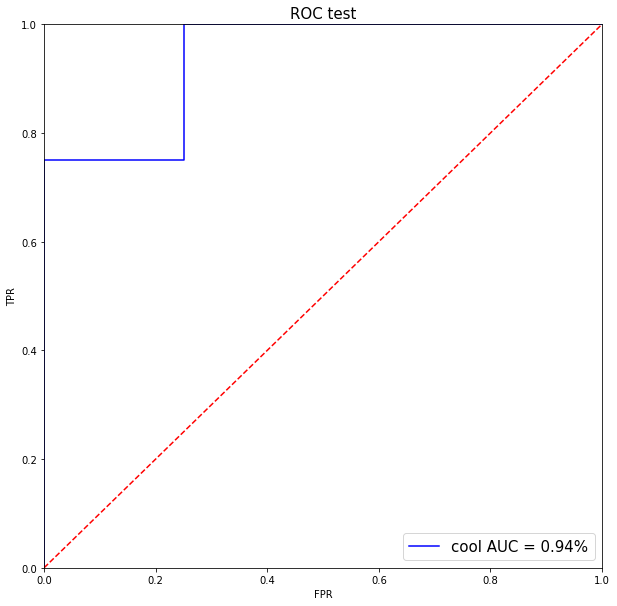

([1, 0.75, 0.5, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0],
 [1, 1.0, 1.0, 1.0, 0.75, 0.75, 0.5, 0.25, 0.0],
 <function sklearn.metrics.ranking.auc(x, y, reorder=False)>)

In [56]:
preds_tester = [.01, .3, .5, .65, .6, .85, .9, .99 ]
targs_tester = [0., 0., 0., 0., 1., 1., 1., 1.]
roc_manual(preds_tester, targs_tester, title='ROC test', auc_type='cool')